This Jupyter Notebook was developed in Google Collab by Mya Yazbek on 3/10/2022. 

#Framing this project:

This is data that needs to be cleaned for a model from [USDA's SNOTEL](https://www.nrcs.usda.gov/wps/portal/wcc/home/quicklinks/imap#version=158&elements=R&networks=!&states=AZ,CO,UT,WY&counties=!&hucs=&minElevation=&maxElevation=&elementSelectType=all&activeOnly=true&activeForecastPointsOnly=false&hucLabels=false&hucIdLabels=false&hucParameterLabels=false&stationLabels=name,id&overlays=&hucOverlays=az_8,co_8,ut_8,wy_8&basinOpacity=100&basinNoDataOpacity=100&basemapOpacity=100&maskOpacity=0&mode=data&openSections=dataElement,parameter,date,basin,options,elements,location,networks,baseMaps,overlays,labels&controlsOpen=true&popup=&popupMulti=&popupBasin=&base=esriNgwm&displayType=station&basinType=6&dataElement=WTEQ&depth=-8&parameter=PCTMED&frequency=DAILY&duration=I&customDuration=1&dayPart=E&monthPart=E&forecastPubDay=1&forecastExceedance=50&seqColor=1&divColor=3&scaleType=D&scaleMin=&scaleMax=&referencePeriodType=POR&referenceBegin=1981&referenceEnd=2020&minimumYears=20&hucAssociations=true&relativeDate=-1&lat=38.085&lon=-110.948&zoom=6.5) real time climate monitoring stations. You will be selecting one SNOTEL station's climate data to use for a river flow model out of 3, denoted by the unique identifiers at the beginning of each. The three SNOTEL sites all hold data on precipitation, snow water equivalent, soil moisture, soil temperature, and air temperature. You will select the attributes that exhibit the strongest correlation coeff when running against DC_Inflow, our endogenous variable. The Colorado River Discharge rate was provided by the USGS National Water Information System website's [listing for the gauge near Diamond Creek](https://waterdata.usgs.gov/nwis/inventory?site_no=09404200). Both these datasets span 15 years, from Jan. 2006 - Dec 2020. 

The data file I am using for this coding session already had the two csv's of river discharge rate and SNOTEL data in the same file, which is up on my github as "

#Step 1: Importing our packages

In [240]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

Great! All packages needed for cleaning, analyzing, and modeling our dataset are now installed. 

#Step 2: Mounting our Google Drive and Importing Our Data

In [241]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The above code mounts your drive. Select your account and press accept. I can now access the files I have in my google drive, which is where I have the csv file to load into a Pandas DataFrame.

#Step 3: Load and View Data

In [242]:
#navigate to the file in your google drive by selecting the file folder 
#to the left of this text

file = "/content/drive/MyDrive/CURRENT Work files/GBI/Research Project/Report/Model_Building/SNOTEL_Site_Selection.csv"

In [243]:
data = pd.read_csv(file)

In [244]:
data.head()

,Date,Diamond_Creek_Inflow_Guage,Camp_Jackson_(383)\nSWE_in\n,Camp_Jackson_(383)\nPrecipitation\nAccumulation\n(in)\n,Camp_Jackson_(383)\nAir\nTemperature\nObserved\n(degF)\n,Camp_Jackson_(383)\nSoil\nTemperature\nObserved_-2in\n(degF)\n,Camp_Jackson_(383)\nSoil\nMoisture\nPercent_-2in\n(pct)\n,East_Willow_Creek_(461)\nSnow\nWater\nEquivalent\n(in)\n,East_Willow_Creek_(461)\nPrecipitation\nAccumulation\n(in)\n,East_Willow_Creek_(461)\nAir\nTemperature\nObserved\n(degF)\n,East_Willow_Creek_(461)\nSoil\nTemperature\nObserved_-2in\n(degF)\n,East_Willow_Creek_(461)\nSoil\nMoisture\nPercent_-2in\n(pct)\n,Lasal_Mountain_(572)\nSnow\nWater\nEquivalent\n(in)\n,Lasal_Mountain_(572)\nPrecipitation\nAccumulation\n(in)\n,Lasal_Mountain_(572)\nAir\nTemperature\nObserved\n(degF)\n,Lasal_Mountain_(572)\nSoil\nTemperature\nObserved_-2in\n(degF)\n,Lasal_Mountain_(572)\nSoil\nMoisture\nPercent_-2in\n(pct)\n
0,1/1/2006,"12,050",0.8,3.8,29.0,33.0,9.0,0.9,2.0,31.0,NaN,NaN,3.8,7.5,28.0,34.0,5.1
1,2/1/2006,"11,880",2.8,5.3,27.0,33.0,9.2,1.8,3.0,25.0,22.0,7.4,6.8,10.8,22.0,34.0,6.0
2,3/1/2006,"11,130",2.9,5.8,33.0,34.0,11.3,1.8,3.3,36.0,29.0,11.7,7.3,12.0,33.0,34.0,12.0
3,4/1/2006,"10,620",8.1,11.2,31.0,35.0,33.3,4.1,6.4,34.0,34.0,27.4,11.7,18.5,31.0,34.0,25.7
4,5/1/2006,"13,500",0.0,12.4,45.0,46.0,23.8,0.0,6.9,41.0,47.0,17.2,0.0,21.0,NaN,50.0,12.6


In [245]:
#data.info()

#Step 4: Cleaning your dataset

Filling nulls

In [246]:
data2 = data.fillna(method="ffill")

Renaming columns for accessibility

Start with putting our column names in a list

In [247]:
my_list = data2.columns.values.tolist()

print(my_list)

['Date', 'Diamond_Creek_Inflow_Guage', 'Camp_Jackson_(383)\nSWE_in\n', 'Camp_Jackson_(383)\nPrecipitation\nAccumulation\n(in)\n', 'Camp_Jackson_(383)\nAir\nTemperature\nObserved\n(degF)\n', 'Camp_Jackson_(383)\nSoil\nTemperature\nObserved_-2in\n(degF)\n', 'Camp_Jackson_(383)\nSoil\nMoisture\nPercent_-2in\n(pct)\n', 'East_Willow_Creek_(461)\nSnow\nWater\nEquivalent\n(in)\n', 'East_Willow_Creek_(461)\nPrecipitation\nAccumulation\n(in)\n', 'East_Willow_Creek_(461)\nAir\nTemperature\nObserved\n(degF)\n', 'East_Willow_Creek_(461)\nSoil\nTemperature\nObserved_-2in\n(degF)\n', 'East_Willow_Creek_(461)\nSoil\nMoisture\nPercent_-2in\n(pct)\n', 'Lasal_Mountain_(572)\nSnow\nWater\nEquivalent\n(in)\n', 'Lasal_Mountain_(572)\nPrecipitation\nAccumulation\n(in)\n', 'Lasal_Mountain_(572)\nAir\nTemperature\nObserved\n(degF)\n', 'Lasal_Mountain_(572)\nSoil\nTemperature\nObserved_-2in\n(degF)\n', 'Lasal_Mountain_(572)\nSoil\nMoisture\nPercent_-2in\n(pct)\n']


In [248]:
print(len(my_list))

17


We will now rename the columns using .rename()

In [249]:
data3 = data2.rename(columns={'Date':"Date", 'Diamond_Creek_Inflow_Guage':"DC_Inflow", 'Camp_Jackson_(383)\nSWE_in\n':"CJ383_SWE_IN", 'Camp_Jackson_(383)\nPrecipitation\nAccumulation\n(in)\n':"CJ383_PA_IN", 'Camp_Jackson_(383)\nAir\nTemperature\nObserved\n(degF)\n':"CJ383_ATO_DEGF", 'Camp_Jackson_(383)\nSoil\nTemperature\nObserved_-2in\n(degF)\n':"CJ383_STO_2IN_DEGF", 'Camp_Jackson_(383)\nSoil\nMoisture\nPercent_-2in\n(pct)\n':"CJ383_SMP_2IN_PCT", 'East_Willow_Creek_(461)\nSnow\nWater\nEquivalent\n(in)\n':"EWC461_SWE_IN_", 'East_Willow_Creek_(461)\nPrecipitation\nAccumulation\n(in)\n':"EWC461_PA_IN", 'East_Willow_Creek_(461)\nAir\nTemperature\nObserved\n(degF)\n':"EWC461_ATO_DEGF", 'East_Willow_Creek_(461)\nSoil\nTemperature\nObserved_-2in\n(degF)\n':"EWC461_STO_2IN_DEGF", 'East_Willow_Creek_(461)\nSoil\nMoisture\nPercent_-2in\n(pct)\n':"EWC461_SMP_2IN_PCT", 'Lasal_Mountain_(572)\nSnow\nWater\nEquivalent\n(in)\n':"LM572_SWE_IN", 'Lasal_Mountain_(572)\nPrecipitation\nAccumulation\n(in)\n':"LM572_PRECP_IN", 'Lasal_Mountain_(572)\nAir\nTemperature\nObserved\n(degF)\n':"LM572_ATO_2IN_DEGF", 'Lasal_Mountain_(572)\nSoil\nTemperature\nObserved_-2in\n(degF)\n':"LM572_STO_2IN_DEGF", 'Lasal_Mountain_(572)\nSoil\nMoisture\nPercent_-2in\n(pct)\n':"LM572_SMP_2IN_PCT"})


In [250]:
my_list2 = data3.columns.values.tolist()

print(my_list2)

['Date', 'DC_Inflow', 'CJ383_SWE_IN', 'CJ383_PA_IN', 'CJ383_ATO_DEGF', 'CJ383_STO_2IN_DEGF', 'CJ383_SMP_2IN_PCT', 'EWC461_SWE_IN_', 'EWC461_PA_IN', 'EWC461_ATO_DEGF', 'EWC461_STO_2IN_DEGF', 'EWC461_SMP_2IN_PCT', 'LM572_SWE_IN', 'LM572_PRECP_IN', 'LM572_ATO_2IN_DEGF', 'LM572_STO_2IN_DEGF', 'LM572_SMP_2IN_PCT']


In [251]:
data3.head()

,Date,DC_Inflow,CJ383_SWE_IN,CJ383_PA_IN,CJ383_ATO_DEGF,CJ383_STO_2IN_DEGF,CJ383_SMP_2IN_PCT,EWC461_SWE_IN_,EWC461_PA_IN,EWC461_ATO_DEGF,EWC461_STO_2IN_DEGF,EWC461_SMP_2IN_PCT,LM572_SWE_IN,LM572_PRECP_IN,LM572_ATO_2IN_DEGF,LM572_STO_2IN_DEGF,LM572_SMP_2IN_PCT
0,1/1/2006,"12,050",0.8,3.8,29.0,33.0,9.0,0.9,2.0,31.0,NaN,NaN,3.8,7.5,28.0,34.0,5.1
1,2/1/2006,"11,880",2.8,5.3,27.0,33.0,9.2,1.8,3.0,25.0,22.0,7.4,6.8,10.8,22.0,34.0,6.0
2,3/1/2006,"11,130",2.9,5.8,33.0,34.0,11.3,1.8,3.3,36.0,29.0,11.7,7.3,12.0,33.0,34.0,12.0
3,4/1/2006,"10,620",8.1,11.2,31.0,35.0,33.3,4.1,6.4,34.0,34.0,27.4,11.7,18.5,31.0,34.0,25.7
4,5/1/2006,"13,500",0.0,12.4,45.0,46.0,23.8,0.0,6.9,41.0,47.0,17.2,0.0,21.0,31.0,50.0,12.6


#Step 5: Visualizing your data

Lets plot the Soil Temp Observed at a 2 inch depth in Degree Farenheit at the Lasal Mountain observation site. 

In [252]:
x_axis = data3["Date"]
y_axis = data3["LM572_STO_2IN_DEGF"]

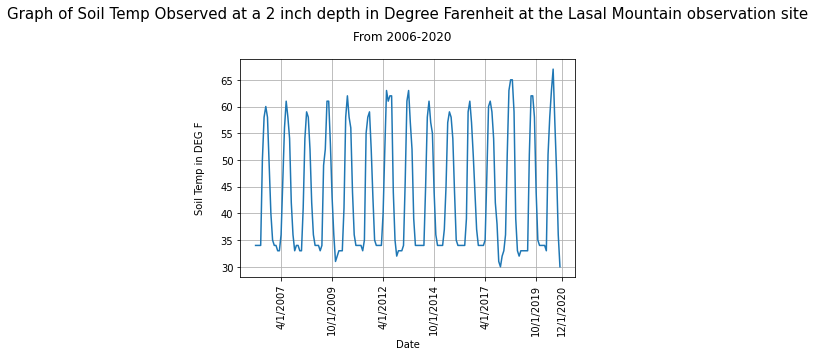

In [253]:
plt.plot(x_axis, y_axis)
plt.grid(True)
plt.title("Graph of Soil Temp Observed at a 2 inch depth in Degree Farenheit at the Lasal Mountain observation site\n\n", size = 15)
plt.suptitle("From 2006-2020")
plt.xlabel("Date")
plt.ylabel("Soil Temp in DEG F\n")

positions = [15, 45, 75, 105, 135, 165, 180]
pos_list = []

for num in positions:
  pos_list.append(x_axis.iloc[num])


#print(pos_list)
plt.xticks(ticks = positions, labels = pos_list, rotation = 'vertical');

Now Let's plot Precipitation at Camp Jackson, Lasal Mountain, and East Willow Creek over 15 years

In [254]:
x = data3["Date"]
y1 = data3["CJ383_PA_IN"]
y2 = data3["EWC461_PA_IN"]
y3 = data3["LM572_PRECP_IN"]

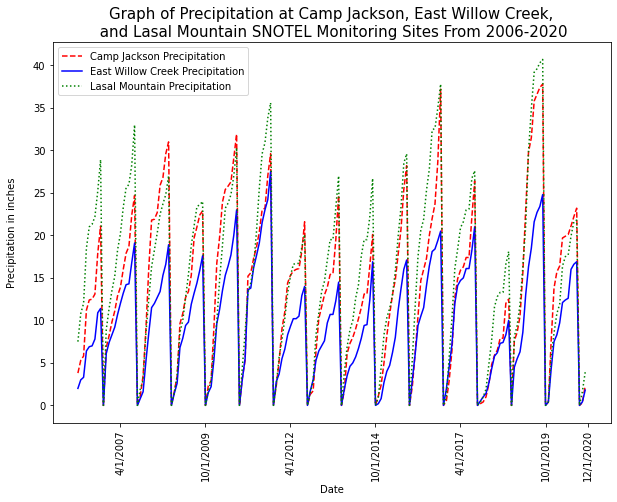

In [255]:
plt.figure(figsize = (10, 7))

# Plot 1st line
plt.plot(x, y1, 'r', linestyle= 'dashed', label = "Camp Jackson Precipitation")

# Plot 2nd line
plt.plot(x, y2, 'b', label="East Willow Creek Precipitation")

# Plot 3rd line
plt.plot(x, y3, 'g', linestyle = 'dotted', label='Lasal Mountain Precipitation');

plt.title("Graph of Precipitation at Camp Jackson, East Willow Creek,\n and Lasal Mountain SNOTEL Monitoring Sites From 2006-2020", size = 15)
plt.suptitle("")
plt.xlabel("Date")
plt.ylabel("Precipitation in inches\n")


positions = [15, 45, 75, 105, 135, 165, 180]
pos_list = []

for num in positions:
  pos_list.append(x_axis.iloc[num])

plt.legend()
#print(pos_list)
plt.xticks(ticks = positions, labels = pos_list, rotation = 'vertical');

#Step 6: Attribute Selection

In [256]:
data_matrix = data3.corr()

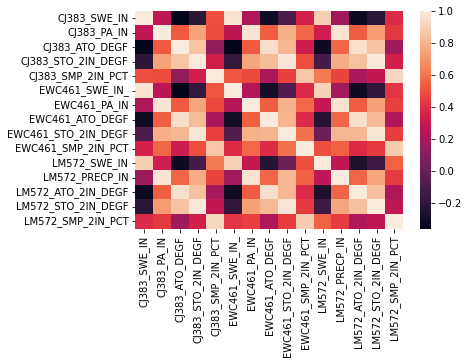

In [257]:
sns.heatmap(data_matrix)

So this is a heatmap of all 5 climate variables from each of the 3 SNOTEL sites (15 attributes total). Let's look at all of the Snow Water Equivalent in inches across our 3 sites to see if they correlate to one another above 95%, as this is the threshold for redundancies among attributes.

In [258]:
new_attribs = data3[["Date", "DC_Inflow", "CJ383_SWE_IN", "EWC461_SWE_IN_", "LM572_SWE_IN"]].copy()

In [259]:
cor_matrix_3 = new_attribs.corr()

In [260]:
new_attribs.head()

,Date,DC_Inflow,CJ383_SWE_IN,EWC461_SWE_IN_,LM572_SWE_IN
0,1/1/2006,"12,050",0.8,0.9,3.8
1,2/1/2006,"11,880",2.8,1.8,6.8
2,3/1/2006,"11,130",2.9,1.8,7.3
3,4/1/2006,"10,620",8.1,4.1,11.7
4,5/1/2006,"13,500",0.0,0.0,0.0


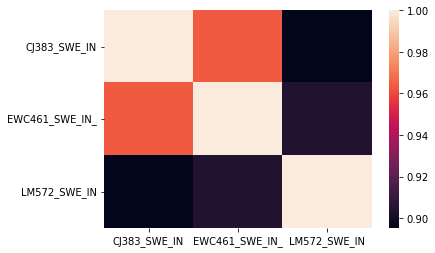

In [261]:
sns.heatmap(cor_matrix_3)

The reason DC_Inflow wasn't showing up is because our DC_Inflow data has a comma in it and our program doesn't like that. Lets remove it. 

#Step 7: More Data Manipulation

In [262]:
new_attribs.replace(',','', regex=True, inplace=True)

In [263]:
new_attribs.head()

,Date,DC_Inflow,CJ383_SWE_IN,EWC461_SWE_IN_,LM572_SWE_IN
0,1/1/2006,12050,0.8,0.9,3.8
1,2/1/2006,11880,2.8,1.8,6.8
2,3/1/2006,11130,2.9,1.8,7.3
3,4/1/2006,10620,8.1,4.1,11.7
4,5/1/2006,13500,0.0,0.0,0.0


All occurences of the , in the DC_Inflow column are now removed.

The rest of our data is a float data type, so we should convert DC_Inflow to a float as well. 

In [264]:
new_attribs["DC_Inflow"] = pd.to_numeric(new_attribs["DC_Inflow"], downcast="float")

In [265]:
new_attribs.head()

,Date,DC_Inflow,CJ383_SWE_IN,EWC461_SWE_IN_,LM572_SWE_IN
0,1/1/2006,12050.0,0.8,0.9,3.8
1,2/1/2006,11880.0,2.8,1.8,6.8
2,3/1/2006,11130.0,2.9,1.8,7.3
3,4/1/2006,10620.0,8.1,4.1,11.7
4,5/1/2006,13500.0,0.0,0.0,0.0


Okay, everything we needed to fix in this dataset should be good for further analyses

#Step 8: More heatmaps

Lets try our correlation coefficient heatmap again. 

In [266]:
another_corr_matrix = new_attribs.corr()

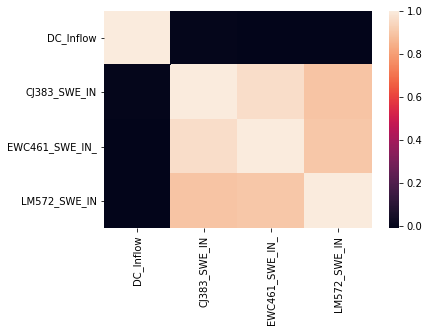

In [267]:
sns.heatmap(another_corr_matrix)

DC Inflow is not highly correlated to SWE in any sites, but the SWE of each site has a high correlation to one another. 

In [268]:
print(another_corr_matrix)

                DC_Inflow  CJ383_SWE_IN  EWC461_SWE_IN_  LM572_SWE_IN
DC_Inflow        1.000000     -0.003307       -0.011801     -0.010709
CJ383_SWE_IN    -0.003307      1.000000        0.963960      0.895253
EWC461_SWE_IN_  -0.011801      0.963960        1.000000      0.904255
LM572_SWE_IN    -0.010709      0.895253        0.904255      1.000000


In [269]:
corr_matrix3 = another_corr_matrix["DC_Inflow"].sort_values(ascending=False) 

print(corr_matrix3)

DC_Inflow         1.000000
CJ383_SWE_IN     -0.003307
LM572_SWE_IN     -0.010709
EWC461_SWE_IN_   -0.011801
Name: DC_Inflow, dtype: float64


These three stations have a negative correlation when compared with DC_Inflow. The highest absolute value coming from the East Willow Creek Snow Water Equivalent IN. Lets see how our other variables like soil moisture and temp compare.

For this, we will revist our main dataset. Lets do the same cleaning methods we did for DC_Inflow like removing commas and changing the dtype to float. 

In [270]:
data3.head()

,Date,DC_Inflow,CJ383_SWE_IN,CJ383_PA_IN,CJ383_ATO_DEGF,CJ383_STO_2IN_DEGF,CJ383_SMP_2IN_PCT,EWC461_SWE_IN_,EWC461_PA_IN,EWC461_ATO_DEGF,EWC461_STO_2IN_DEGF,EWC461_SMP_2IN_PCT,LM572_SWE_IN,LM572_PRECP_IN,LM572_ATO_2IN_DEGF,LM572_STO_2IN_DEGF,LM572_SMP_2IN_PCT
0,1/1/2006,"12,050",0.8,3.8,29.0,33.0,9.0,0.9,2.0,31.0,NaN,NaN,3.8,7.5,28.0,34.0,5.1
1,2/1/2006,"11,880",2.8,5.3,27.0,33.0,9.2,1.8,3.0,25.0,22.0,7.4,6.8,10.8,22.0,34.0,6.0
2,3/1/2006,"11,130",2.9,5.8,33.0,34.0,11.3,1.8,3.3,36.0,29.0,11.7,7.3,12.0,33.0,34.0,12.0
3,4/1/2006,"10,620",8.1,11.2,31.0,35.0,33.3,4.1,6.4,34.0,34.0,27.4,11.7,18.5,31.0,34.0,25.7
4,5/1/2006,"13,500",0.0,12.4,45.0,46.0,23.8,0.0,6.9,41.0,47.0,17.2,0.0,21.0,31.0,50.0,12.6


In [271]:
data3["DC_Inflow"] = pd.to_numeric(new_attribs["DC_Inflow"], downcast="float")

In [272]:
data3.head()

,Date,DC_Inflow,CJ383_SWE_IN,CJ383_PA_IN,CJ383_ATO_DEGF,CJ383_STO_2IN_DEGF,CJ383_SMP_2IN_PCT,EWC461_SWE_IN_,EWC461_PA_IN,EWC461_ATO_DEGF,EWC461_STO_2IN_DEGF,EWC461_SMP_2IN_PCT,LM572_SWE_IN,LM572_PRECP_IN,LM572_ATO_2IN_DEGF,LM572_STO_2IN_DEGF,LM572_SMP_2IN_PCT
0,1/1/2006,12050.0,0.8,3.8,29.0,33.0,9.0,0.9,2.0,31.0,NaN,NaN,3.8,7.5,28.0,34.0,5.1
1,2/1/2006,11880.0,2.8,5.3,27.0,33.0,9.2,1.8,3.0,25.0,22.0,7.4,6.8,10.8,22.0,34.0,6.0
2,3/1/2006,11130.0,2.9,5.8,33.0,34.0,11.3,1.8,3.3,36.0,29.0,11.7,7.3,12.0,33.0,34.0,12.0
3,4/1/2006,10620.0,8.1,11.2,31.0,35.0,33.3,4.1,6.4,34.0,34.0,27.4,11.7,18.5,31.0,34.0,25.7
4,5/1/2006,13500.0,0.0,12.4,45.0,46.0,23.8,0.0,6.9,41.0,47.0,17.2,0.0,21.0,31.0,50.0,12.6


In [273]:
here_we_go_again = data3.corr()

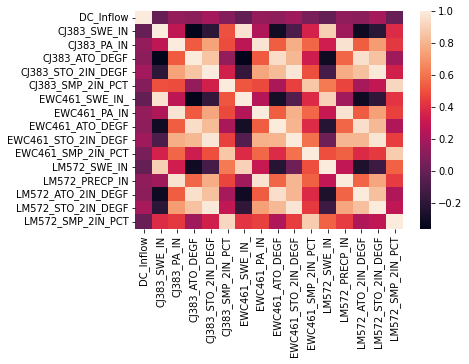

In [274]:
sns.heatmap(here_we_go_again)

#Step 9: Final Selection

Lets find out which weather station/attribute has most effect on our dependent variable DC_Inflow

In [275]:
corr_matrix3 = here_we_go_again["DC_Inflow"].sort_values(ascending=False) 

print(corr_matrix3)

DC_Inflow              1.000000
LM572_STO_2IN_DEGF     0.198663
CJ383_STO_2IN_DEGF     0.193714
EWC461_STO_2IN_DEGF    0.180444
EWC461_PA_IN           0.144830
CJ383_PA_IN            0.139915
LM572_PRECP_IN         0.131646
EWC461_ATO_DEGF        0.125930
CJ383_ATO_DEGF         0.121674
LM572_ATO_2IN_DEGF     0.118902
CJ383_SMP_2IN_PCT      0.090439
EWC461_SMP_2IN_PCT     0.057445
LM572_SMP_2IN_PCT      0.002967
CJ383_SWE_IN          -0.003307
LM572_SWE_IN          -0.010709
EWC461_SWE_IN_        -0.011801
Name: DC_Inflow, dtype: float64


The highest correlation coefficient when compared against DC_Inflow is the Soil Temperature Observed for Lasal Mountain (in Farenheit).

In [276]:
corr_matrix4 = here_we_go_again["LM572_STO_2IN_DEGF"].sort_values(ascending=False) 

print(corr_matrix4)

LM572_STO_2IN_DEGF     1.000000
CJ383_STO_2IN_DEGF     0.988847
EWC461_STO_2IN_DEGF    0.974961
CJ383_ATO_DEGF         0.855629
LM572_ATO_2IN_DEGF     0.842450
EWC461_ATO_DEGF        0.823222
LM572_PRECP_IN         0.756017
EWC461_PA_IN           0.738896
CJ383_PA_IN            0.727915
EWC461_SMP_2IN_PCT     0.437698
CJ383_SMP_2IN_PCT      0.288393
LM572_SMP_2IN_PCT      0.277710
DC_Inflow              0.198663
LM572_SWE_IN          -0.140991
EWC461_SWE_IN_        -0.188644
CJ383_SWE_IN          -0.211086
Name: LM572_STO_2IN_DEGF, dtype: float64


In [277]:
corr_matrix5 = here_we_go_again["EWC461_PA_IN"].sort_values(ascending=False) 

print(corr_matrix5)


EWC461_PA_IN           1.000000
CJ383_PA_IN            0.970010
LM572_PRECP_IN         0.967831
EWC461_STO_2IN_DEGF    0.795259
CJ383_STO_2IN_DEGF     0.759016
LM572_STO_2IN_DEGF     0.738896
EWC461_SMP_2IN_PCT     0.566633
EWC461_ATO_DEGF        0.537085
LM572_ATO_2IN_DEGF     0.535958
CJ383_ATO_DEGF         0.529725
CJ383_SMP_2IN_PCT      0.480735
LM572_SMP_2IN_PCT      0.452895
LM572_SWE_IN           0.304904
EWC461_SWE_IN_         0.244926
CJ383_SWE_IN           0.226643
DC_Inflow              0.144830
Name: EWC461_PA_IN, dtype: float64


What we're doing here is going one by one down the list of attributes and seeing which station has the highest corr coef to select a combination of ones for our final model. So far its **LM572_STO_2IN_DEGF**, or Lasal Mountain Soil Temperature Observed in Farenheit, and **EWC461_PA_IN** which is the code for East Willow Creek Precipitation Accumulation in Inches. Next we'll look at **LM572_PRECP_IN** and **EWC461_ATO_DEGF**

In [278]:
corr_matrix6 = here_we_go_again["LM572_PRECP_IN"].sort_values(ascending=False) 

print(corr_matrix6)

LM572_PRECP_IN         1.000000
EWC461_PA_IN           0.967831
CJ383_PA_IN            0.964562
EWC461_STO_2IN_DEGF    0.809568
CJ383_STO_2IN_DEGF     0.778237
LM572_STO_2IN_DEGF     0.756017
EWC461_ATO_DEGF        0.561268
CJ383_ATO_DEGF         0.560784
LM572_ATO_2IN_DEGF     0.555109
EWC461_SMP_2IN_PCT     0.545342
CJ383_SMP_2IN_PCT      0.468059
LM572_SMP_2IN_PCT      0.445287
LM572_SWE_IN           0.286250
EWC461_SWE_IN_         0.182782
CJ383_SWE_IN           0.175986
DC_Inflow              0.131646
Name: LM572_PRECP_IN, dtype: float64


In [279]:
last_corr_matrix = here_we_go_again["EWC461_ATO_DEGF"].sort_values(ascending=False) 

print(last_corr_matrix)

EWC461_ATO_DEGF        1.000000
LM572_ATO_2IN_DEGF     0.956170
CJ383_ATO_DEGF         0.948820
CJ383_STO_2IN_DEGF     0.827813
LM572_STO_2IN_DEGF     0.823222
EWC461_STO_2IN_DEGF    0.803325
LM572_PRECP_IN         0.561268
CJ383_PA_IN            0.541873
EWC461_PA_IN           0.537085
EWC461_SMP_2IN_PCT     0.392665
LM572_SMP_2IN_PCT      0.231518
CJ383_SMP_2IN_PCT      0.215505
DC_Inflow              0.125930
LM572_SWE_IN          -0.228904
EWC461_SWE_IN_        -0.288714
CJ383_SWE_IN          -0.302357
Name: EWC461_ATO_DEGF, dtype: float64


So the columns of the dataframe listed above will be made into a new csv file and saved on this here drive. 

Just to refresh, the columns are: CJ383_SMP_2IN_PCT, EWC461_ATO_DEGF, EWC461_PA_IN, and EWC461_SWE_IN_

In [280]:
data3.head()

,Date,DC_Inflow,CJ383_SWE_IN,CJ383_PA_IN,CJ383_ATO_DEGF,CJ383_STO_2IN_DEGF,CJ383_SMP_2IN_PCT,EWC461_SWE_IN_,EWC461_PA_IN,EWC461_ATO_DEGF,EWC461_STO_2IN_DEGF,EWC461_SMP_2IN_PCT,LM572_SWE_IN,LM572_PRECP_IN,LM572_ATO_2IN_DEGF,LM572_STO_2IN_DEGF,LM572_SMP_2IN_PCT
0,1/1/2006,12050.0,0.8,3.8,29.0,33.0,9.0,0.9,2.0,31.0,NaN,NaN,3.8,7.5,28.0,34.0,5.1
1,2/1/2006,11880.0,2.8,5.3,27.0,33.0,9.2,1.8,3.0,25.0,22.0,7.4,6.8,10.8,22.0,34.0,6.0
2,3/1/2006,11130.0,2.9,5.8,33.0,34.0,11.3,1.8,3.3,36.0,29.0,11.7,7.3,12.0,33.0,34.0,12.0
3,4/1/2006,10620.0,8.1,11.2,31.0,35.0,33.3,4.1,6.4,34.0,34.0,27.4,11.7,18.5,31.0,34.0,25.7
4,5/1/2006,13500.0,0.0,12.4,45.0,46.0,23.8,0.0,6.9,41.0,47.0,17.2,0.0,21.0,31.0,50.0,12.6


In [281]:
final_dataset = data3[["CJ383_SMP_2IN_PCT", "EWC461_ATO_DEGF", "EWC461_PA_IN", "EWC461_SWE_IN_"]].copy()

One last corr  heatmap with the attributes we picked out just for the fun of it (against DC_Inflow)

In [282]:
one_last_time = data3[["DC_Inflow", "CJ383_SMP_2IN_PCT", "EWC461_ATO_DEGF", "EWC461_PA_IN", "EWC461_SWE_IN_"]].copy()

In [283]:
one_last_kiss_i_mean_corr = one_last_time.corr()

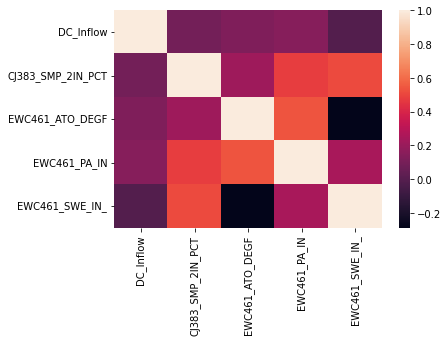

In [284]:
sns.heatmap(one_last_kiss_i_mean_corr)

Beautiful! Now thats what a corr heatmap should look like with 0 redundancies.

#Step 10: Reviewing and Saving your new dataset

Lets look at the header to make sure we have everything we need before we save to our csv file.

In [285]:
final_dataset.head()

,CJ383_SMP_2IN_PCT,EWC461_ATO_DEGF,EWC461_PA_IN,EWC461_SWE_IN_
0,9.0,31.0,2.0,0.9
1,9.2,25.0,3.0,1.8
2,11.3,36.0,3.3,1.8
3,33.3,34.0,6.4,4.1
4,23.8,41.0,6.9,0.0


Yep, Everything's there! We did not include Date or DC_Inflow because it is already in the final dataset. We will save this to a csv file called "final_data.csv"

In [286]:
final_dataset.to_csv('final_data.csv')
!cp final_data.csv "/content/drive/MyDrive/CURRENT Work files/GBI/Research Project/Report/Model_Building"

The above code automatically places the new file in the folder you tell it to. You need the last line of code if you are running this program in google collab (.ipynb)

#NextSteps Research Project

The next steps before our final model is built is to go through this same process with another cluster of 2 SNOTEL monitoring site data to select for the model. 